# Bone age Prediction: Deep CNN Approaches for predicting bone age from hand X-ray radiographs

## Part One: Training Phase
### In this part, we prepare the dataset, train models using both deep CNN approaches, save the trained models, and analyze the results.

### *Note: Part One is already completed for this project. If you wish to change the hyperparameters, you must rerun Part One, which will take around 4 hours to train both networks. Otherwise, you can proceed to Part Two.*

### Preprocessing Data

We start by importing the necessary libraries, including OpenCV for image processing, Mediapipe for hand detection, and NumPy for array manipulations.

- The handRec function uses Mediapipe's hand detection to locate hands in an image and crops out empty spaces around the detected hand. This reduces the image size to focus on the area of interest

- CLAHE enhances the contrast of an image by applying histogram equalization in small regions. This function converts the image to LAB color space, applies CLAHE to the L channel (lightness), and merges the channels back to obtain the enhanced image

- The resize function resizes the cropped image to a square with dimensions specified by the user (output_size). This ensures all images have a uniform size, which is necessary for model training

- We finally convert RGB color space to GrayScale

- We do this operations locally using OpenCV because TensorFlow cannot directly work with NumPy objects in its computational graph, and there is no CLAHE implementation in TensorFlow and Kaggle CPUs are not very fast

In [ ]:
# from scipy import ndimage
# import mediapipe as mp
# import numpy as np
# import time
# import sys
# import cv2
# import os
# import platform

In [ ]:
# def clahe3(image, clip_limit=2.0, tile_grid_size=(8, 8)):
#     lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
#     l, a, b = cv2.split(lab)
#     clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
#     l = clahe.apply(l)
#     lab = cv2.merge((l, a, b))
#     result = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
#     return result


# def handRec(img):
#     global suc
#     result = Hands.process(img)
#     h, w, c = img.shape
#     hand_landmarks = result.multi_hand_landmarks
#     x_max = 0
#     x_min = w
#     y_min = h
#     if hand_landmarks:
#         for handLMs in hand_landmarks:
#             x_max = 0
#             x_min = w
#             y_min = h
#             for lm in handLMs.landmark:
#                 x, y = int(lm.x * w), int(lm.y * h)
#                 if x > x_max:
#                     x_max = x
#                 if x < x_min:
#                     x_min = x
#                 if y < y_min:
#                     y_min = y
#         offset = int((h * offset_percent) / 100)
#         y_min_new = y_min - offset
#         x_min_new = x_min - offset
#         x_max_new = x_max + offset
#         if (y_min_new < 0):
#             y_min_new = 0
#         if (x_min_new < 0):
#             x_min_new = 0
#         if (x_max_new > w):
#             x_max_new = w
#         suc += 1
#         return img[y_min_new:h, x_min_new:x_max_new]
#     else:
#         return img


# def resize(img):
#     height, width = img.shape[:2]
#     max_dim = max(height, width)
#     square_img = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
#     x_pad = (max_dim - width) // 2
#     y_pad = (max_dim - height) // 2
#     square_img[y_pad:y_pad + height, x_pad:x_pad + width] = img
#     resized = cv2.resize(square_img, (output_size, output_size),
#                          interpolation=cv2.INTER_AREA)
#     return resized


# def _print():
#     now = time.time() - start_time
#     print("%c[%d;%df" % (0x1B, 0, 0), end='')
#     print(
#         "PREPROCESS ON HAND X-RAY IMAGES  |  2023"
#         "\nInput directory:  ", image_dir, "\nOutput directory: ", output_dir,
#         "\nOutput Size: ", output_size,
#         ("px | 3" if output_channel == 1 else "px | 1"), "Output channels ",
#         "\nRunning time: %02d:%05.02f" % (int(now / 60), now % 60),
#         f"\nproccessed images: %s/%s (%%%s)" %
#         (count, img_count, int(
#             (count / img_count * 100))), "  \nHand detection succsess rate: %",
#         int(suc / count * 100), "   ")


# hands = mp.solutions.hands
# Hands = hands.Hands()
# offset_percent = 5  # offset percentage for croping the detected hand
# rotation_percent = 20  # offset percentage for hand straightening
# count = 0  # count of images which has been processed
# suc = 0  # count of images wihcn successfully found a hand in it

# if (len(sys.argv) < 2):
#     print("You should give the input directory as an argument!",
#           "\nExample: py preProcess.py \'...path_to_images\'")
#     exit(0)
# image_dir = os.path.abspath(str(
#     sys.argv[1][:-1]))  # path to the directory containing the images
# if (str(platform.system()).lower() == "windows"):
#     output_dir = os.path.abspath(os.path.join(
#         image_dir, os.pardir)) + "\\" + os.path.basename(
#             image_dir) + " (preprocessed)\\"  # path to the output directory
# else:
#     output_dir = os.path.abspath(os.path.join(
#         image_dir, os.pardir)) + "/" + os.path.basename(
#             image_dir) + " (preprocessed)/"  # path to the output directory

# if not os.path.exists(output_dir):
#     os.mkdir(output_dir)
# img_count = len([  # number of total images in the <image_dir> directory
#     entry for entry in os.listdir(image_dir)
#     if os.path.isfile(os.path.join(image_dir, entry))
# ])
# output_size = int(input("Output size (ex: 256) :\n"))
# output_channel = int(
#     input(
#         "Output channels :\n 1) RGB (3channels)\n 2) Grayscale (1channel)\n"))

# os.system('cls')
# start_time = time.time()
# for filename in os.listdir(image_dir):
#     count += 1
#     img = cv2.imread(os.path.join(image_dir, filename))
#     if (img is None):
#         print("couldn't open image!")
#     else:
#         img = handRec(img)  # detect the hand for croping the image
#         img = clahe3(img)  # adjust the brightness and contrast of the image
#         img = resize(img)  # resize the image to <output_size>
#         if output_channel == 2:
#             img = cv2.cvtColor(
#                 img, cv2.COLOR_BGR2GRAY)  # Reduce the channels from 3 to 1
#         cv2.imwrite(os.path.join(output_dir, filename), img)  # save
#         _print()

### Data General Prepration

In this section, we have defined several functions to prepare the data and associated labels, organizing them into a DataFrame with Three columns:

1.Image File Absolute Path: This column contains the absolute paths to the image files, ensuring that each image can be easily accessed and processed

2.Gender: This column indicates the gender of the individual in the image, with 1 representing male and 0 representing female

3.Age in Months: This column records the age of the individual in months

In [1]:
import os
import time
import psutil
import re
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2024-08-27 11:44:54.802376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-08-27 11:44:54.802482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-08-27 11:44:54.922061: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def get_file_absolute_path(directory):
    file_names = os.listdir(directory)
    file_absolute_path = []
    for file_name in file_names:
        file_absolute_path.append(directory + file_name)
    return file_absolute_path


def convert_pandas_label_to_dict(dataframe):
    np_array = dataframe.values
    result = {}
    for values in np_array:
        values = np.array(values, ndmin=2)
        first_column = values[:, 0][0]
        remaining_array = np.squeeze(values[:, 1:])
        result[int(first_column)] = remaining_array
    return result


def create_dataset_dataframe(directory, labels):
    data_container = []
    paths = get_file_absolute_path(directory)
    for path in paths:
        gender = labels[int(re.findall(
            '[0-9]+', path.split('/')[-1])[0])][0]
        age = labels[int(re.findall('[0-9]+', path.split('/')[-1])[0])][1]
        data_container.append([path, gender, age])
    return pd.DataFrame(data_container, columns=['file_absolute_path', ' gender', 'age'])

In this section, we utilize the previously defined functions to prepare and organize our dataset into three distinct DataFrames: training, validation, and test sets.

In [3]:
dir_root = '/kaggle/input/hda-bone-age-grayscale-256/Bone Age Dataset/'

training_root = 'Bone Age Training Set/'
validation_root = 'Bone Age Validation Set/'
test_root = 'Bone Age Test Set/'

data_path = 'Data/'
label_path = 'labels.csv'

training_dataset_path = dir_root + training_root + data_path
validation_dataset_path = dir_root + validation_root + data_path
test_dataset_path = dir_root + test_root + data_path

training_labels_path = dir_root + training_root + label_path
validation_labels_path = dir_root + validation_root + label_path
test_labels_path = dir_root + test_root + label_path

training_labels = pd.read_csv(training_labels_path)
cols = list(training_labels.columns)
cols[-1], cols[-2] = cols[-2], cols[-1]
training_labels = training_labels[cols]
training_labels['male'] = training_labels['male'].map(
    {True: 1., False: 0.}).astype(int)

validation_labels = pd.read_csv(validation_labels_path)
validation_labels['male'] = validation_labels['male'].map(
    {True: 1., False: 0.}).astype(int)

test_labels = pd.read_csv(test_labels_path)
test_labels['Sex'] = test_labels['Sex'].map({'M': 1., 'F': 0.})
test_labels = test_labels.astype(int)

training_labels = convert_pandas_label_to_dict(training_labels)

validation_labels = convert_pandas_label_to_dict(validation_labels)

test_labels = convert_pandas_label_to_dict(test_labels)


training_dataframe = create_dataset_dataframe(
    training_dataset_path, training_labels)
validation_dataframe = create_dataset_dataframe(
    validation_dataset_path, validation_labels)
test_dataframe = create_dataset_dataframe(test_dataset_path, test_labels)

In this section, we selected a resolution size of 256x256 pixels with 1 channel (grayscale) and a batch size of 128. Additionally, we implemented an image generator function to facilitate the creation of a `tf.Dataset` object using the `from_generator` method.

Furthermore, we normalized the image values and structured the input data as tuples of (image, gender) while setting the labels as age.

In [4]:
SIZE = 256
batch_size = 128
CHANNELS = 1


def image_generator(file_names, gender, age):
    for file_name, gender, age in zip(file_names, gender, age):
        image = tf.io.decode_png(tf.io.read_file(file_name), channels=CHANNELS)
        yield image, gender, age

In [5]:
def data_augmentation(image, gender, age):
    return tf.cast(image, tf.float32) / 255., gender, age


def split_input_label(image, gender, age):
    return (image, gender), age

In [6]:
def create_dataset(dataframe, augmentation_func, shuffle, cache, cache_name=None, repeat=True):
    dataset = tf.data.Dataset.from_generator(
        image_generator,
        args=[dataframe.iloc[:, 0].values,
              dataframe.iloc[:, 1].values, dataframe.iloc[:, 2].values],
        output_signature=(
            tf.TensorSpec(shape=(None, None, CHANNELS), dtype=tf.uint8),
            tf.TensorSpec(shape=(), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.float32)
        )
    )
    dataset = dataset.map(
        augmentation_func, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(
        split_input_label, num_parallel_calls=tf.data.AUTOTUNE)
    if cache:
        dataset = dataset.cache(cache_name)
    if shuffle:
        dataset = dataset.shuffle(
            buffer_size=dataset.cardinality(), reshuffle_each_iteration=True)
    if repeat:
        dataset = dataset.repeat()
    dataset = dataset.batch(batch_size, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

In [7]:
train_dataset = create_dataset(training_dataframe, data_augmentation,
                               shuffle=True, cache=True, cache_name='training set', repeat=True)
validation_dataset = create_dataset(validation_dataframe, data_augmentation,
                                    shuffle=False, cache=True, cache_name='validation set', repeat=False)
test_dataset = create_dataset(test_dataframe, data_augmentation,
                              shuffle=False, cache=False, cache_name=None, repeat=False)

Here, we have defined a set of functions to aid in visualizing both the dataset samples and the training performance of machine learning models. 

In [31]:
def plot_image(dataset, index):
    ds = dataset.take(1).get_single_element()
    plt.imshow(ds[0][0][index], cmap=plt.cm.gray, interpolation='nearest')
    gender = "FEMALE" if ds[0][1][index].numpy() == 0 else "MALE"
    plt.title("GENDER: %s, AGE: %s" % (gender, ds[1][index].numpy()))
    plt.show()
    print()
    return


def plot_metrics(history, metric, model_name):
    print()
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    name = metric.replace('_', ' ')
    plt.title('Model '+name.title())
    plt.ylabel(name.upper())
    plt.xlabel('epoch')
    if model_name == 'InceptionV4':
        plt.yscale('log')
    plt.legend(['train', 'val'], loc='center right')
    plt.show()
    return


def plot_loss(history, metric):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    name = metric.replace('_', ' ')
    plt.title('Model '+name.title())
    plt.ylabel(name.upper())
    plt.xlabel('epoch')
    plt.yscale('log')
    plt.legend(['train', 'val'], loc='center right')
    plt.show()
    return

#### Dataset Description:

For our project, we will use `12,611` training hands’ X-ray images (digital and scanned) from two U.S. hospitals. The labels are a CSV file containing the bone age (to be predicted in the month) and the gender (useful additional For this project), we utilize a dataset consisting of X-ray images of hands (both digital and scanned formats) sourced from two hospitals in the United States. These images are intended for a bone age prediction task, which involves estimating the bone age of individuals based on their hand X-rays.

The dataset is accompanied by a CSV file that contains crucial labels and additional features for each image. These labels and additional features include:

- Bone Age: The bone age, measured in months, serves as the target variable for our regression task.

- Gender: The gender of the individual (male or female) is also provided as an additional feature in the CSV file. Including gender information can be valuable for the model, as it can influence bone development patterns. By leveraging gender as an additional input feature, the model can potentially improve its prediction accuracy.

A sample of test set: 


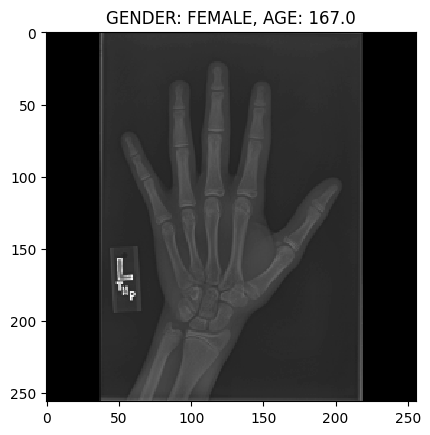



A sample of validation set: 


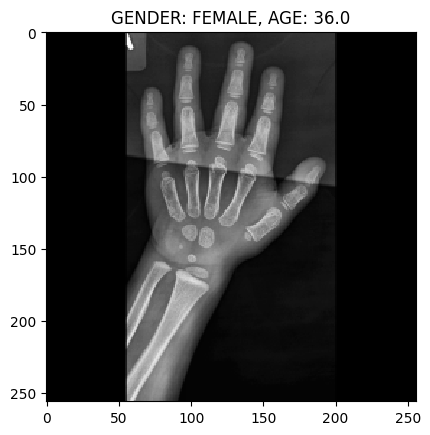



A sample of train set: 


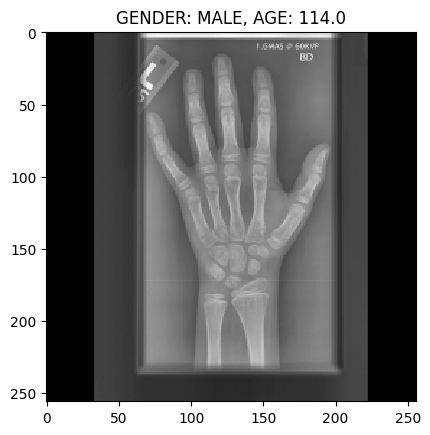

In [9]:
index = np.random.randint(0, batch_size, (1,))[0]

print('A sample of test set: ')
plot_image(test_dataset, index)

print('A sample of validation set: ')
plot_image(validation_dataset, index)

print('A sample of train set: ')
plot_image(train_dataset, index)

With a dataset of `12,611` images and a batch size of 128, the model processes `128` images at a time. It takes `99` batches (steps) to go through all the images once. Thus, there are 99 training steps per epoch, meaning the model updates its parameters 99 times to complete one full pass (forward pass and backpropagate) through the training data.

In [10]:
train_steps = int(np.ceil(len(training_dataframe) / batch_size)) # training steps = 99

We also created a custom EarlyStopping class to halt training if there was no improvement in Mean Absolute Error (MAE) after a certain number of epochs.

Additionally, we developed a custom callback called `TotalTimeMemoryCallback` to calculate the total time and memory used by the model during training.

In [11]:
class EarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, monitor, threshold, max_epochs, patience=3):
        super(EarlyStopping, self).__init__()
        self.monitor = monitor
        self.patience = patience
        self.threshold = threshold
        self.best_weights = None
        self.max_epochs = max_epochs
        self.best_monitoring_value = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_monitoring_value = logs.get(self.monitor)
        if current_monitoring_value is None:
            raise ValueError(
                f"The metric {self.monitor} is not available in logs for early stopping.")
        if epoch >= self.max_epochs-1:
            print(
                f"\n--- Early stopping: Reached maximum number of epochs : {self.max_epochs} \n")
            self.model.stop_training = True
            self.model.set_weights(self.best_weights)
            return
        if current_monitoring_value < self.best_monitoring_value:
            self.best_weights = self.model.get_weights()
            self.best_monitoring_value = current_monitoring_value
        if current_monitoring_value > self.threshold:
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(
                    f"\n--- Early stopping: {self.monitor} has been below {self.threshold} for {self.patience} epochs.\n")
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)
                return

In [12]:
class TotalTimeMemoryCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.total_time = 0
        self.total_memory = 0

    def on_train_begin(self, logs=None):
        self.train_time_start = time.time()
        self.train_memory_start = psutil.Process().memory_info().rss / (1024 ** 2)

    def on_train_end(self, logs=None):
        self.total_time = (time.time() - self.train_time_start) / 60
        self.total_memory = (psutil.Process().memory_info(
        ).rss / (1024 ** 2)) - self.train_memory_start
        print(
            f"Training - Total time: {self.total_time:.4f} minutes, Total memory used: {self.total_memory:.4f} MB")

    def on_epoch_end(self, epoch, logs=None):
        epoch_time = (time.time() - self.train_time_start) / 60
        epoch_memory = (psutil.Process().memory_info().rss /
                        (1024 ** 2)) - self.train_memory_start
        print(
            f"Epoch {epoch + 1} - Time elapsed: {epoch_time:.4f} minutes, Memory used: {epoch_memory:.4f} MB")

## First Approach
### DenseNet-121 For Bone Age Prediction


In this approach, we implemented DenseNet-121 from scratch for the regression task.



**Key considerations:**

- ReLu is used as the activation function for all hidden layers
- The final layer uses Linear as its activation function
- We employed the Adam optimizer to minimize the loss function and update the gradients
- A CosineDecay learning rate schedule is followed to gradually decrease the learning rate during training for stabilizing the training process
- Mean Squared Error is utilized as the loss function
- Model performance is evaluated using RMSE, MAE, and R2Score metrics.

In [13]:
class DenseNet121:
    def __conv_block(self, x, growth_rate):
        x1 = tf.keras.layers.BatchNormalization()(x)
        x1 = tf.keras.layers.Activation('relu')(x1)
        x1 = tf.keras.layers.Conv2D(4 * growth_rate, (1, 1), strides=(1, 1), padding='same',
                                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=1e-4))(x1)
        x1 = tf.keras.layers.BatchNormalization()(x1)
        x1 = tf.keras.layers.Activation('relu')(x1)
        x1 = tf.keras.layers.Conv2D(growth_rate, (3, 3), strides=(
            1, 1), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=1e-4))(x1)
        return tf.keras.layers.Concatenate(axis=-1)([x, x1])

    def __dense_block(self, x, blocks, growth_rate):
        for _ in range(blocks):
            x = self.__conv_block(x, growth_rate)
        return x

    def __transition_block(self, x, reduction):
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)
        x = tf.keras.layers.Conv2D(int(x.shape[-1] * reduction), (1, 1), strides=(
            1, 1), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=1e-4))(x)
        return tf.keras.layers.AveragePooling2D((2, 2), strides=(2, 2))(x)

    def __DenseNet121(self, input_shape):
        input_layer = tf.keras.layers.Input(
            shape=input_shape, name='image_input')

        x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', kernel_initializer='he_normal',
                                   kernel_regularizer=tf.keras.regularizers.L2(l2=1e-4))(input_layer)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)
        x = tf.keras.layers.MaxPooling2D(
            (3, 3), strides=(2, 2), padding='same')(x)

        x = self.__dense_block(x, 6, 32)
        x = self.__transition_block(x, 0.5)

        x = self.__dense_block(x, 12, 32)
        x = self.__transition_block(x, 0.5)

        x = self.__dense_block(x, 24, 32)
        x = self.__transition_block(x, 0.5)

        x = self.__dense_block(x, 16, 32)

        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)
        x = tf.keras.layers.GlobalAveragePooling2D()(x)

        return tf.keras.models.Model(inputs=input_layer, outputs=x, name='DenseNet121')

    def build_model(self, input_shape):
        base_model = self.__DenseNet121(input_shape=input_shape)

        gender_input = tf.keras.layers.Input(shape=(1,), name='gender_input')
        gender_processed = tf.keras.layers.Dense(
            16, activation='relu')(gender_input)
        gender_processed = tf.keras.layers.Dense(
            8, activation='relu')(gender_processed)
        concatenated = tf.keras.layers.Concatenate()(
            [base_model.output, gender_processed])

        fc = tf.keras.layers.Dense(
            32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(concatenated)
        fc = tf.keras.layers.Dense(
            16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(fc)
        fc = tf.keras.layers.Dropout(rate=0.01)(fc)
        fc = tf.keras.layers.Dense(1, activation='linear')(fc)

        return tf.keras.models.Model(inputs=[base_model.input, gender_input], outputs=fc, name='DenseNet121_Regressor')

In [14]:
densenet = DenseNet121().build_model(input_shape=(SIZE, SIZE, CHANNELS))
densenet.summary()

Model: "DenseNet121_Regressor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      3,200 │ image_input[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │      8,320 │ activation_1[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     36,896 │ activation_2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ max_pooling2d[0]… │
│ (Concatenate)       │ 96)               │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │     12,416 │ activation_3[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 64, 64,    │          0 │ batch_normalizat

 Total params: 7,075,241 (26.99 MB)

 Trainable params: 6,991,593 (26.67 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [15]:
number_of_epochs = 80

early_stopping = EarlyStopping(monitor='val_mean_absolute_error',
                               threshold=10,
                               max_epochs=number_of_epochs,
                               patience=3)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model_densenet.keras',
    monitor='val_mean_absolute_error',
    mode='min',
    save_best_only=True,
    verbose=1)

In [16]:
learning_rate_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.005,
    decay_steps=train_steps * number_of_epochs,
    alpha=0.0
)

densenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule),
                 loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[
                     tf.keras.metrics.MeanAbsoluteError(),
                     tf.keras.metrics.RootMeanSquaredError(),
                     tf.keras.metrics.R2Score()
])

time_memory_callback = TotalTimeMemoryCallback()

densenet_history = densenet.fit(train_dataset,
                                epochs=number_of_epochs,
                                steps_per_epoch=train_steps,
                                validation_data=validation_dataset,
                                callbacks=[checkpoint, early_stopping,
                                           time_memory_callback],
                                verbose='auto')

Epoch 1/80



I0000 00:00:1724759526.359537     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - loss: 4811.4385 - mean_absolute_error: 52.3771 - r2_score: -1.8928 - root_mean_squared_error: 65.8379

Epoch 1: val_mean_absolute_error improved from inf to 66.31681, saving model to best_model_densenet.keras


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.

  self.gen.throw(typ, value, traceback)


Epoch 1 - Time elapsed: 6.2100 minutes, Memory used: 6161.2969 MB

99/99 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - loss: 4784.9990 - mean_absolute_error: 52.1937 - r2_score: -1.8766 - root_mean_squared_error: 65.6446 - val_loss: 6194.5586 - val_mean_absolute_error: 66.3168 - val_r2_score: -2.5585 - val_root_mean_squared_error: 78.6766

Epoch 2/80

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 604.9895 - mean_absolute_error: 18.5748 - r2_score: 0.6439 - root_mean_squared_error: 24.4794

Epoch 2: val_mean_absolute_error did not improve from 66.31681

Epoch 2 - Time elapsed: 7.4069 minutes, Memory used: 6299.8945 MB

99/99 ━━━━━━━━━━━━━━━━━━━━ 72s 725ms/step - loss: 604.4564 - mean_absolute_error: 18.5653 - r2_score: 0.6442 - root_mean_squared_error: 24.4685 - val_loss: 6823.7158 - val_mean_absolute_error: 74.3064 - val_r2_score: -2.9201 - val_root_mean_squared_error: 82.5771

Epoch 3/80

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 706ms/step - loss: 466.2965 - mean_absolute_error: 15.7931 - r2_score: 0.7

In [17]:
print(f"Total training time: {time_memory_callback.total_time:.4f} minutes")
print(f"Total memory usage: {time_memory_callback.total_memory:.4f} MB")

Total training time: 86.8386 minutes

Total memory usage: 7074.2812 MB


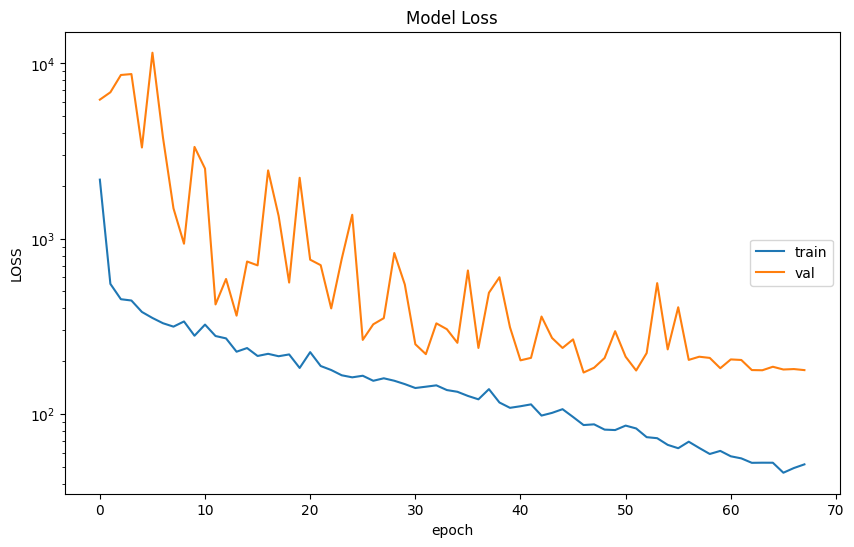

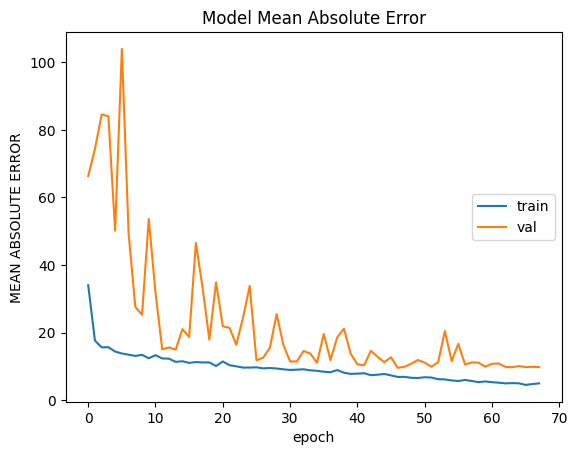

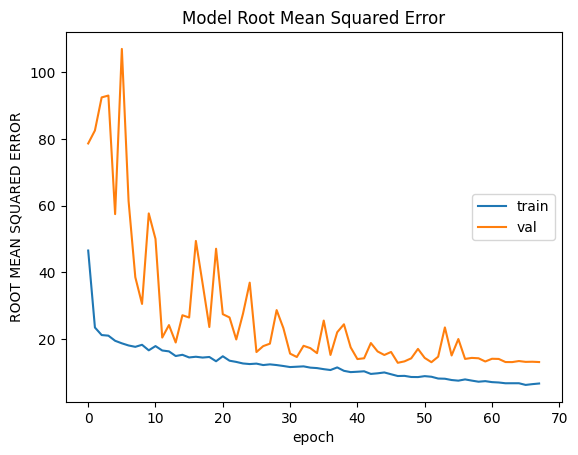

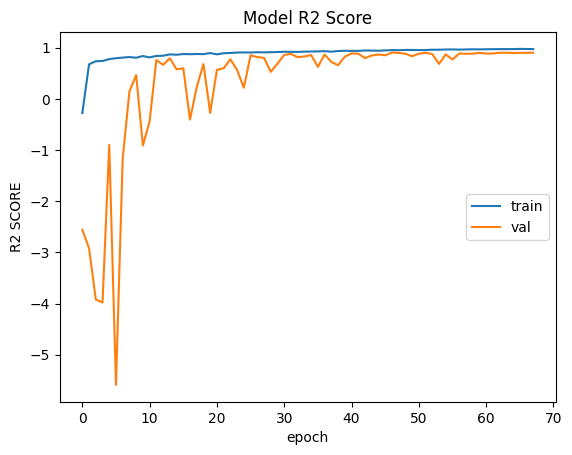

In [33]:
plot_loss(densenet_history, 'loss')
plot_metrics(densenet_history, 'mean_absolute_error', model_name='DenseNet121')
plot_metrics(densenet_history, 'root_mean_squared_error',
             model_name='DenseNet121')
plot_metrics(densenet_history, 'r2_score', model_name='DenseNet121')

In [19]:
densenet_score = densenet.evaluate(test_dataset, verbose='auto')
print("DenseNet regressor evaluation results:\n")
print('Testset Loss = {:.5f}'.format(densenet_score[0]))
print('Testset MAE = {:.2f}'.format(densenet_score[1]))
print('Testset RMSE = {:.2f}'.format(densenet_score[2]))
print('Testset R2Score = {:.2f}'.format(densenet_score[3]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 18s/step - loss: 245.5874 - mean_absolute_error: 11.7681 - r2_score: 0.8758 - root_mean_squared_error: 15.3886

DenseNet regressor evaluation results:



Testset Loss = 251.71284

Testset MAE = 11.71

Testset RMSE = 15.59

Testset R2Score = 0.87


## First Approach
### InceptionV4 For Bone Age Prediction


In this approach, we implemented InceptionV4 from scratch for the regression task.



**Key considerations:**

- ReLu is used as the activation function for all hidden layers
- The final layer uses Linear as its activation function
- We employed the Adam optimizer to minimize the loss function and update the gradients
- A CosineDecay learning rate schedule is followed to gradually decrease the learning rate during training for stabilizing the training process
- Mean Squared Error is utilized as the loss function
- Model performance is evaluated using RMSE, MAE, and R2Score metrics.

In [22]:
class InceptionV4:

    def __conv2d_with_batch(self, prev_layer, nbr_kernels, filter_size, strides=(1, 1), padding='valid'):
        X = tf.keras.layers.Conv2D(
            filters=nbr_kernels, kernel_size=filter_size, strides=strides, padding=padding)(prev_layer)
        X = tf.keras.layers.BatchNormalization()(X)
        return tf.keras.layers.Activation('relu')(X)

    def __stem_block(self, prev_layer):
        X = self.__conv2d_with_batch(prev_layer, 32, (3, 3), strides=(2, 2))
        X = self.__conv2d_with_batch(X, 32, (3, 3))
        X = self.__conv2d_with_batch(X, 64, (3, 3), padding='same')

        X_1 = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)
        X_2 = self.__conv2d_with_batch(X, 96, (3, 3), strides=(2, 2))
        X = tf.keras.layers.concatenate([X_1, X_2], axis=3)

        X_1 = self.__conv2d_with_batch(X, 64, (1, 1), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 64, (7, 1), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 64, (1, 7), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 96, (3, 3), padding='valid')

        X_2 = self.__conv2d_with_batch(X, 64, (1, 1), padding='same')
        X_2 = self.__conv2d_with_batch(X_2, 96, (3, 3), padding='valid')

        X = tf.keras.layers.concatenate([X_1, X_2], axis=3)

        X_1 = self.__conv2d_with_batch(X, 192, (3, 3), strides=(2, 2))
        X_2 = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)
        X = tf.keras.layers.concatenate([X_1, X_2], axis=3)

        return X

    def __reduction_A_block(self, prev_layer):
        X_1 = self.__conv2d_with_batch(prev_layer, 384, (3, 3), strides=(2, 2))

        X_2 = self.__conv2d_with_batch(prev_layer, 192, (1, 1), padding='same')
        X_2 = self.__conv2d_with_batch(X_2, 224, (3, 3), padding='same')
        X_2 = self.__conv2d_with_batch(X_2, 256, (3, 3), strides=(2, 2))

        X_3 = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(prev_layer)

        return tf.keras.layers.concatenate([X_1, X_2, X_3], axis=3)

    def __reduction_B_block(self, prev_layer):
        X_1 = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(prev_layer)

        X_2 = self.__conv2d_with_batch(prev_layer, 192, (1, 1), padding='same')
        X_2 = self.__conv2d_with_batch(X_2, 192, (3, 3), strides=(2, 2))

        X_3 = self.__conv2d_with_batch(prev_layer, 256, (1, 1), padding='same')
        X_3 = self.__conv2d_with_batch(X_3, 256, (1, 7), padding='same')
        X_3 = self.__conv2d_with_batch(X_3, 320, (7, 1), padding='same')
        X_3 = self.__conv2d_with_batch(X_3, 320, (3, 3), strides=(2, 2))

        return tf.keras.layers.concatenate([X_1, X_2, X_3], axis=3)

    def __inception_block_A(self, prev_layer):
        X_1 = self.__conv2d_with_batch(prev_layer, 64, (1, 1), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 96, (3, 3), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 96, (3, 3), padding='same')

        X_2 = self.__conv2d_with_batch(prev_layer, 64, (1, 1), padding='same')
        X_2 = self.__conv2d_with_batch(X_2, 96, (3, 3), padding='same')

        X_3 = tf.keras.layers.AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(prev_layer)
        X_3 = self.__conv2d_with_batch(X_3, 96, (1, 1), padding='same')

        X_4 = self.__conv2d_with_batch(prev_layer, 96, (1, 1), padding='same')

        return tf.keras.layers.concatenate([X_1, X_2, X_3, X_4], axis=3)

    def __inception_block_B(self, prev_layer):
        X_1 = self.__conv2d_with_batch(prev_layer, 192, (1, 1), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 192, (7, 1), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 224, (1, 7), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 224, (7, 1), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 256, (1, 7), padding='same')

        X_2 = self.__conv2d_with_batch(prev_layer, 192, (1, 1), padding='same')
        X_2 = self.__conv2d_with_batch(X_2, 224, (1, 7), padding='same')
        X_2 = self.__conv2d_with_batch(X_2, 256, (7, 1), padding='same')

        X_3 = tf.keras.layers.AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(prev_layer)
        X_3 = self.__conv2d_with_batch(X_3, 128, (1, 1), padding='same')

        X_4 = self.__conv2d_with_batch(prev_layer, 384, (1, 1), padding='same')

        return tf.keras.layers.concatenate([X_1, X_2, X_3, X_4], axis=3)

    def __inception_block_C(self, prev_layer):
        X_1 = self.__conv2d_with_batch(prev_layer, 384, (1, 1), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 448, (1, 3), padding='same')
        X_1 = self.__conv2d_with_batch(X_1, 512, (3, 1), padding='same')

        X_1_1 = self.__conv2d_with_batch(X_1, 256, (1, 3), padding='same')
        X_1_2 = self.__conv2d_with_batch(X_1, 256, (3, 1), padding='same')

        X_1 = tf.keras.layers.concatenate([X_1_1, X_1_2], axis=3)

        X_2 = self.__conv2d_with_batch(prev_layer, 384, (1, 1), padding='same')
        X_2_1 = self.__conv2d_with_batch(X_2, 256, (1, 3), padding='same')
        X_2_2 = self.__conv2d_with_batch(X_2, 256, (3, 1), padding='same')

        X_2 = tf.keras.layers.concatenate([X_2_1, X_2_2], axis=3)

        X_3 = tf.keras.layers.AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(prev_layer)
        X_3 = self.__conv2d_with_batch(X_3, 256, (1, 1), padding='same')

        X_4 = self.__conv2d_with_batch(prev_layer, 256, (1, 1), padding='same')

        return tf.keras.layers.concatenate([X_1, X_2, X_3, X_4], axis=3)

    def __InceptionV4(self, input_shape):
        input_layer = tf.keras.layers.Input(
            shape=input_shape, name='image_input')

        X = self.__stem_block(prev_layer=input_layer)

        for _ in range(4):
            X = self.__inception_block_A(prev_layer=X)

        X = self.__reduction_A_block(prev_layer=X)

        for _ in range(7):
            X = self.__inception_block_B(prev_layer=X)

        X = self.__reduction_B_block(prev_layer=X)

        for _ in range(3):
            X = self.__inception_block_C(prev_layer=X)

        X = tf.keras.layers.GlobalAveragePooling2D()(X)

        return tf.keras.models.Model(inputs=input_layer, outputs=X, name='InceptionV4')

    def build_model(self, input_shape):
        base_model = self.__InceptionV4(input_shape=input_shape)

        gender_input = tf.keras.layers.Input(shape=(1,), name='gender_input')
        gender_processed = tf.keras.layers.Dense(
            16, activation='relu')(gender_input)
        gender_processed = tf.keras.layers.Dense(
            8, activation='relu')(gender_processed)
        concatenated = tf.keras.layers.Concatenate()(
            [base_model.output, gender_processed])

        fc = tf.keras.layers.Dropout(rate=0.03)(concatenated)
        fc = tf.keras.layers.Dense(1, activation='linear')(fc)
        return tf.keras.models.Model(inputs=[base_model.input, gender_input], outputs=fc, name='InceptionV4_Regressor')

In [23]:
inceptionv4 = InceptionV4().build_model(input_shape=(SIZE, SIZE, CHANNELS))
inceptionv4.summary()

Model: "InceptionV4_Regressor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_269 (Conv2D) │ (None, 127, 127,  │        320 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │        128 │ conv2d_269[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_270      │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_270 (Conv2D) │ (None, 125, 125,  │      9,248 │ activation_270[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        128 │ conv2d_270[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_271      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_271 (Conv2D) │ (None, 125, 125,  │     18,496 │ activation_271[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        256 │ conv2d_271[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_272      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_272 (Conv2D) │ (None, 62, 62,    │     55,392 │ activation_272[0… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        384 │ conv2d_272[0][0]  │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 62, 62,    │          0 │ activation_272[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_273      │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_85      │ (None, 62, 62,    │          0 │ max_pooling2d_5[… │
│ (Concatenate)       │ 160)              │            │ activation_273[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_273 (Conv2D) │ (None, 62, 62,    │     10,304 │ concatenate_85[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        256 │ conv2d_273[0][0]

 Total params: 41,238,705 (157.31 MB)

 Trainable params: 41,175,537 (157.07 MB)

 Non-trainable params: 63,168 (246.75 KB)

In [24]:
number_of_epochs = 80
early_stopping = EarlyStopping(monitor='val_mean_absolute_error',
                               threshold=10,
                               max_epochs=number_of_epochs,
                               patience=3)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model_inceptionv4.keras',
    monitor='val_mean_absolute_error',
    mode='min',
    save_best_only=True,
    verbose=1)

In [25]:
learning_rate_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=train_steps * number_of_epochs,
    alpha=0.0
)

inceptionv4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule),
                    loss=tf.keras.losses.MeanSquaredError(),
                    metrics=[
                        tf.keras.metrics.MeanAbsoluteError(),
                        tf.keras.metrics.RootMeanSquaredError(),
                        tf.keras.metrics.R2Score()
])

time_memory_callback = TotalTimeMemoryCallback()

inceptionv4_history = inceptionv4.fit(train_dataset,
                                      epochs=number_of_epochs,
                                      steps_per_epoch=train_steps,
                                      validation_data=validation_dataset,
                                      callbacks=[
                                          checkpoint, early_stopping, time_memory_callback],
                                      verbose='auto')

Epoch 1/80


2024-08-27 13:42:09.122067: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,32,125,125]{3,2,1,0}, f32[128,64,125,125]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...

2024-08-27 13:42:09.663353: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.541395939s

Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,32,125,125]{3,2,1,0}, f32[128,64,125,125]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...

2024-08-27 13:42:11.523440: E ex

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 12877.8662 - mean_absolute_error: 105.2337 - r2_score: -6.7766 - root_mean_squared_error: 113.0914

Epoch 1: val_mean_absolute_error improved from inf to 6461.46680, saving model to best_model_inceptionv4.keras

Epoch 1 - Time elapsed: 6.8608 minutes, Memory used: 7798.9688 MB

99/99 ━━━━━━━━━━━━━━━━━━━━ 412s 1s/step - loss: 12844.7158 - mean_absolute_error: 105.0610 - r2_score: -6.7552 - root_mean_squared_error: 112.9384 - val_loss: 41760052.0000 - val_mean_absolute_error: 6461.4668 - val_r2_score: -24005.8672 - val_root_mean_squared_error: 6462.2017

Epoch 2/80

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2741.5754 - mean_absolute_error: 43.5338 - r2_score: -0.6234 - root_mean_squared_error: 52.0125

Epoch 2: val_mean_absolute_error improved from 6461.46680 to 78.06123, saving model to best_model_inceptionv4.keras

Epoch 2 - Time elapsed: 8.8776 minutes, Memory used: 9689.8320 MB

99/99 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - loss: 2732.960

In [26]:
print(f"Total training time: {time_memory_callback.total_time:.4f} minutes")
print(f"Total memory usage: {time_memory_callback.total_memory:.4f} MB")

Total training time: 127.9328 minutes

Total memory usage: 13617.1211 MB


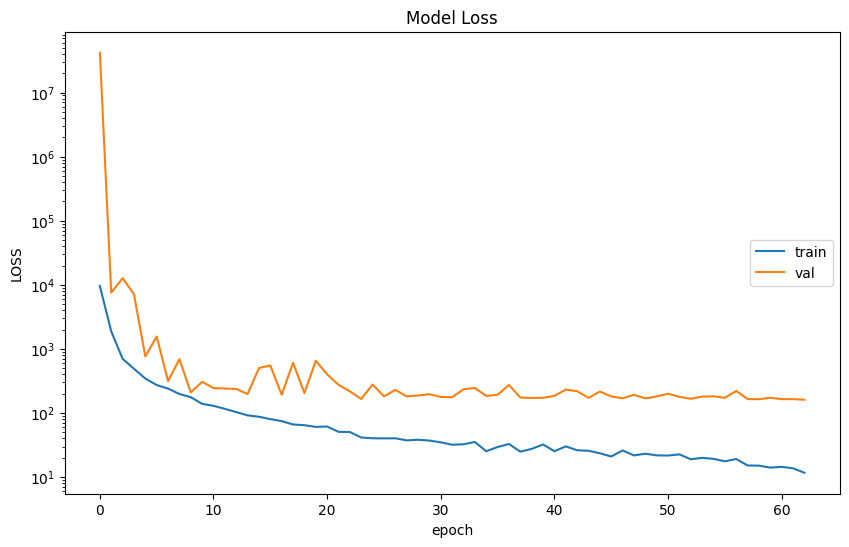

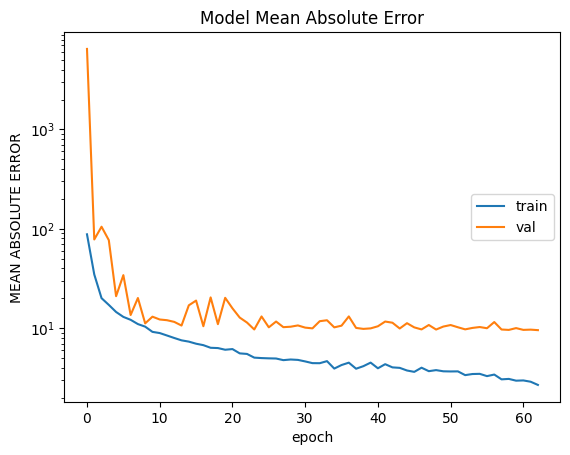

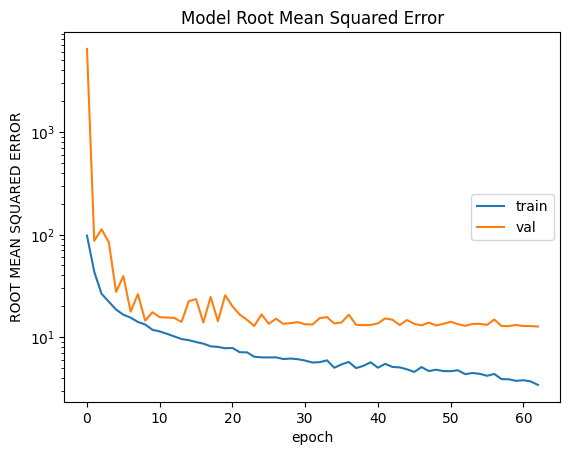

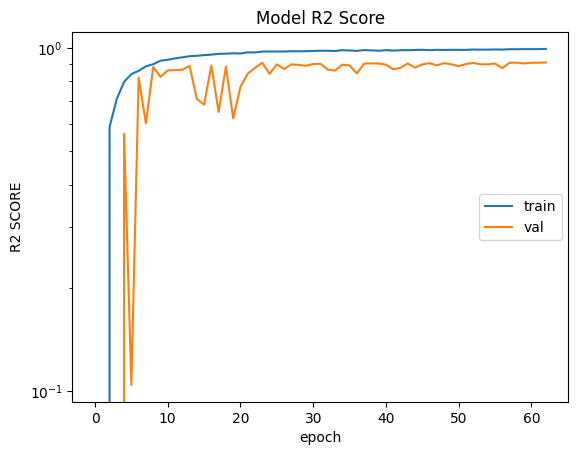

In [32]:
plot_loss(inceptionv4_history, 'loss')
plot_metrics(inceptionv4_history, 'mean_absolute_error',
             model_name='InceptionV4')
plot_metrics(inceptionv4_history, 'root_mean_squared_error',
             model_name='InceptionV4')
plot_metrics(inceptionv4_history, 'r2_score', model_name='InceptionV4')

In [28]:
inceptionv4_score = inceptionv4.evaluate(test_dataset, verbose='auto')
print("Inception V4  regressor evaluation results:\n")
print('Testset Loss = {:.5f}'.format(inceptionv4_score[0]))
print('Testset MAE = {:.2f}'.format(inceptionv4_score[1]))
print('Testset RMSE = {:.2f}'.format(inceptionv4_score[2]))
print('Testset R2 Score = {:.2f}'.format(inceptionv4_score[3]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 16s/step - loss: 136.5452 - mean_absolute_error: 8.9387 - r2_score: 0.9286 - root_mean_squared_error: 11.6844

Inception V4  regressor evaluation results:



Testset Loss = 134.19334

Testset MAE = 8.80

Testset RMSE = 11.58

Testset R2 Score = 0.93


# Part Two: DEMO Phase

In this part we use the models that we trained in the previous part to perform a prediction task on the testset as demo (if needed).

In [1]:
import os
import re
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2024-08-28 19:12:45.984148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-28 19:12:45.984279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 19:12:46.122538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def get_file_absolute_path(directory):
    file_names = os.listdir(directory)
    file_absolute_path = []
    for file_name in file_names:
        file_absolute_path.append(directory + file_name)
    return file_absolute_path


def convert_pandas_label_to_dict(dataframe):
    np_array = dataframe.values
    result = {}
    for values in np_array:
        values = np.array(values, ndmin=2)
        first_column = values[:, 0][0]
        remaining_array = np.squeeze(values[:, 1:])
        result[int(first_column)] = remaining_array
    return result


def create_dataset_dataframe(directory, labels):
    data_container = []
    paths = get_file_absolute_path(directory)
    for path in paths:
        gender = labels[int(re.findall('[0-9]+', path.split('/')[-1])[0])][0]
        age = labels[int(re.findall('[0-9]+', path.split('/')[-1])[0])][1]
        data_container.append([path, gender, age])
    return pd.DataFrame(data_container, columns=['file_absolute_path', ' gender', 'age'])

In [3]:
dir_root = '/kaggle/input/hda-bone-age-grayscale-256/Bone Age Dataset/'

test_root = 'Bone Age Test Set/'

data_path = 'Data/'
label_path = 'labels.csv'

test_dataset_path = dir_root + test_root + data_path

test_labels_path = dir_root + test_root + label_path

test_labels = pd.read_csv(test_labels_path)
test_labels['Sex'] = test_labels['Sex'].map({'M': 1., 'F': 0.})
test_labels = test_labels.astype(int)

test_labels = convert_pandas_label_to_dict(test_labels)

test_dataframe = create_dataset_dataframe(test_dataset_path, test_labels)

In [4]:
SIZE = 256
batch_size = 128
CHANNELS = 1


def image_generator(file_names, gender, age):
    for file_name, gender, age in zip(file_names, gender, age):
        image = tf.io.decode_png(tf.io.read_file(file_name), channels=CHANNELS)
        yield image, gender, age

In [5]:
def data_augmentation(image, gender, age):
    return tf.cast(image, tf.float32) / 255., gender, age


def split_input_label(image, gender, age):
    return (image, gender), age

In [6]:
def data_augmentation(image, gender, age):
    return tf.cast(image, tf.float32) / 255., gender, age


def split_input_label(image, gender, age):
    return (image, gender), age

In [7]:
def create_dataset(dataframe, augmentation_func, shuffle, cache, cache_name=None, repeat=True):
    dataset = tf.data.Dataset.from_generator(
        image_generator,
        args=[dataframe.iloc[:, 0].values,
              dataframe.iloc[:, 1].values, dataframe.iloc[:, 2].values],
        output_signature=(
            tf.TensorSpec(shape=(None, None, CHANNELS), dtype=tf.uint8),
            tf.TensorSpec(shape=(), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.float32)
        )
    )
    dataset = dataset.map(
        augmentation_func, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(
        split_input_label, num_parallel_calls=tf.data.AUTOTUNE)
    if cache:
        dataset = dataset.cache(cache_name)
    if shuffle:
        dataset = dataset.shuffle(
            buffer_size=dataset.cardinality(), reshuffle_each_iteration=True)
    if repeat:
        dataset = dataset.repeat()
    dataset = dataset.batch(batch_size, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

In [8]:
test_dataset = create_dataset(test_dataframe, data_augmentation,
                              shuffle=False, cache=False, cache_name=None, repeat=False)

In [9]:
def plot_image(dataset, index):
    ds = dataset.take(1).get_single_element()
    plt.imshow(ds[0][0][index], cmap=plt.cm.gray, interpolation='nearest')
    gender = "FEMALE" if ds[0][1][index].numpy() == 0 else "MALE"
    plt.title("GENDER: %s, AGE: %s" % (gender, ds[1][index].numpy()))
    plt.show()
    print()
    return

A sample of test set: 


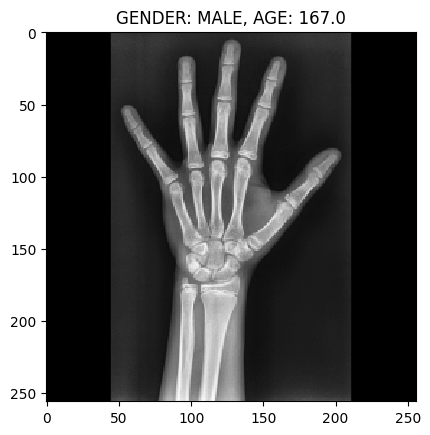

In [10]:
index = np.random.randint(0, batch_size, (1,))[0]

print('A sample of test set: ')
plot_image(test_dataset, index)

In [11]:
path = '/kaggle/input/hda-model-weights/best_model_'

densenet_model = tf.keras.models.load_model(path + 'densenet.keras')
inceptionv4_model = tf.keras.models.load_model(path + 'inceptionv4.keras')

In [12]:
densenet_evaluation = densenet_model.evaluate(
    test_dataset, return_dict=True, verbose='auto')
inceptionv4_evaluation = inceptionv4_model.evaluate(
    test_dataset, return_dict=True, verbose='auto')

I0000 00:00:1724873124.144746     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


      2/Unknown 50s 18s/step - loss: 242.5246 - mean_absolute_error: 11.7962 - r2_score: 0.8794 - root_mean_squared_error: 15.2884

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 52s 19s/step - loss: 245.5874 - mean_absolute_error: 11.7681 - r2_score: 0.8758 - root_mean_squared_error: 15.3886
2/2 ━━━━━━━━━━━━━━━━━━━━ 46s 16s/step - loss: 136.5452 - mean_absolute_error: 8.9387 - r2_score: 0.9286 - root_mean_squared_error: 11.6844


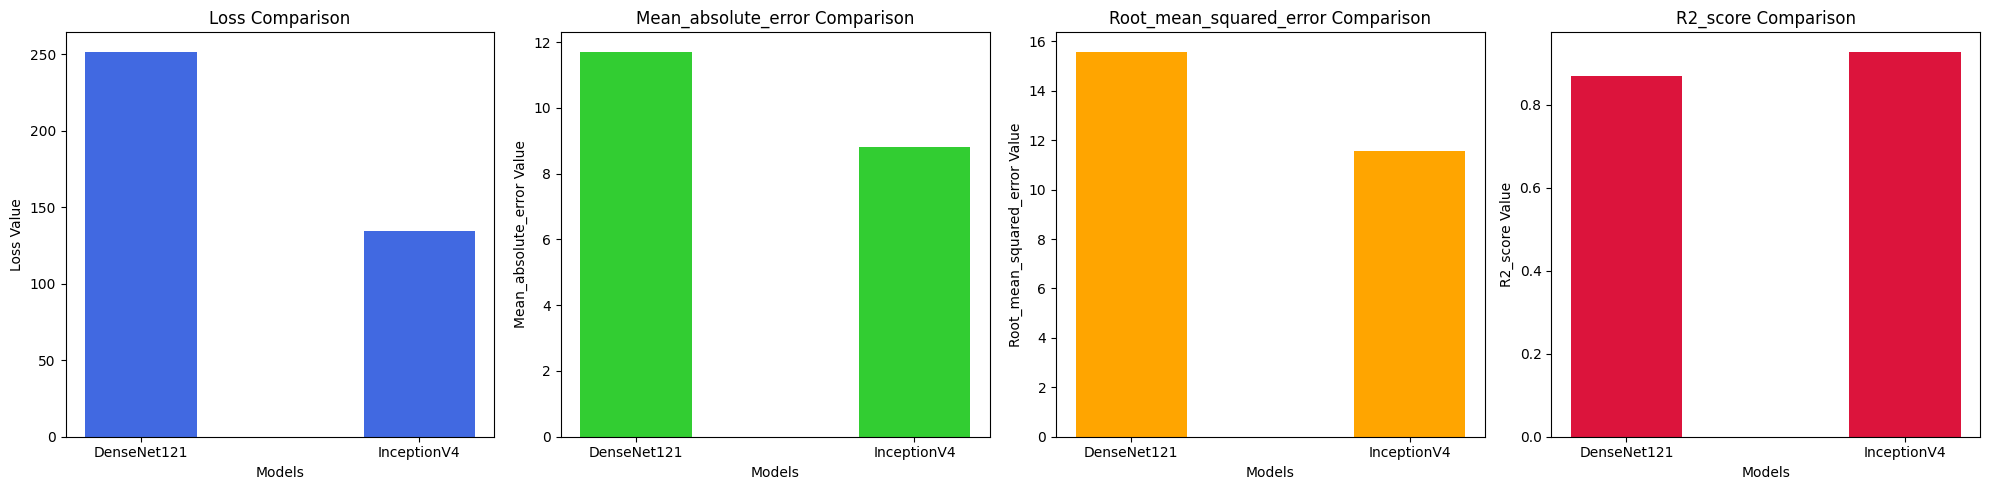

The mean of errors with DenseNet-121 is: 11.71
The mean of errors with InceptionV4 is: 8.80


In [34]:
models = ['DenseNet121', 'InceptionV4']
metrics = ['loss', 'mean_absolute_error',
           'root_mean_squared_error', 'r2_score']
data = {
    'DenseNet121': densenet_evaluation,
    'InceptionV4': inceptionv4_evaluation,
}
bar_width = 0.4
x = np.arange(len(models))
colors = ['royalblue', 'limegreen', 'orange', 'crimson']
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, (metric, color) in enumerate(zip(metrics, colors)):
    values = [data[model][metric] for model in models]
    axs[i].bar(x, values, bar_width, color=color, label=metric.capitalize())

    axs[i].set_xlabel('Models')
    axs[i].set_ylabel(f'{metric.capitalize()} Value')
    axs[i].set_title(f'{metric.capitalize()} Comparison')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(models)
plt.tight_layout()
plt.show()

print('The mean of errors with DenseNet-121 is: {:.2f}'.format(
    densenet_evaluation['mean_absolute_error']))
print('The mean of errors with InceptionV4 is: {:.2f}'.format(
    inceptionv4_evaluation['mean_absolute_error']))

## Conclusion

### InceptionV4 outperformed DenseNet-121 with lower loss, MAE, RMSE and higher R2Score.